# Ensemble method

* ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

  * ***bagging method***
    * 여러개의 부트스트랩 샘플을 만들어 동일 알고리즘을 이용해 적합
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  
  * boosting method
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

  * voting method
    * 서로다른 여러 모델을 사용하여 성능을 올린다
    * Hard voting, Soft voting등 


# Bagging method

* 데이터 샘플링(Bootstrap)을 통해 모델을 학습시키고 결과를 집계(Aggregating) 하는 방법
* 각각의 Bootstrap샘플을 모델링 한다(같은 모델 사용)
* 각각의 모델이 서로 영향을 주지 않는다
* 분산을 줄이고 과적합을 막음

### module import

In [2]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn import datasets
from sklearn.datasets import load_diabetes

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split
import sklearn.model_selection as ms

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor

In [6]:
import pandas as pd
import numpy as np

## Bagging Classifier

### Hyper-parameter

* estimator : object
  * ```default = None```
    * if None DecistionTreeClassifier use
  * bagging을 사용할 모델 선정

* n_estimators : int
  * ```default = 10```
  * 부트스트랩 샘플 갯수 지정
    * 부트스트랩 샘플 당 한개의 모델 생성(동일 모델)

* max_samples : int or float
  * ```default=1.0```
    * integer도 받아진다 => 1로 두면 sample이 1개만뽑혀서 오류난다
    * 1.0으로 둬야함
  * The number of samples to draw from X to train each base estimator


* max_features : int or float
  * ```default=1.0```
  * The number of features to draw from X to train each base estimator 

* oob_score : bool
  * ```default=False```
  * Whether to use out-of-bag samples to estimate the generalization error.
  * 성능 향상이 있는건 아님 그냥 oob_score을 보여줌

* bootstrap : bool
  * ```default=True```
  * Whether samples are drawn with replacement. If False, sampling without replacement is performed.

In [43]:
BaggingClassifier().get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### <참고> oob_score = True를 사용할때

In [44]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 1000, n_features = 3, n_informative = 2,
                           n_redundant = 0 , n_clusters_per_class = 1) 

In [45]:
base_model = DecisionTreeClassifier()
bagging_model = BaggingClassifier(base_model,
                                  n_estimators = 10,
                                  max_samples = 1.0,
                                  oob_score = True,
                                  random_state = 2023)   

In [46]:
bagging_model.fit(X, y) 

#oob_scores를 구할 수 없는 경우가 존재

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(estimator=DecisionTreeClassifier(), oob_score=True,
                  random_state=2023)

In [47]:
res = bagging_model.estimators_samples_[0]
for samples in bagging_model.estimators_samples_:
  res = np.intersect1d(res, samples)
print(res)

# oob_score을 계산하려면 bootstrap sample을 뽑을때 
# -> 적어도 1개 이상의 bootstrap sample에 포함되면 안됨
# -> 지금 뽑은 sample들은 모든 bootstrap sample에 포함이 되어있다
# -> oob_score을 계산하려면 자신이 포함되지 않은 모델으로 적합하여 계산해야됨.

[148 149 220 224 255 300 448 452 509 551 649 676 771 814 835 887 951]


In [48]:
bootstrap_prob = 0.6
bootstrap_count = 10
n_samples = 1000

(0.6 ** 10) * 1000

# 모든 bootstrap sample들에 포함되는 samples 의 기댓값이 6개이다
# -> n_estimator = 10 일때

6.046617599999998

In [49]:
(0.6 ** 20) * 1000

# 모든 bootstrap sample들에 포함되는 samples 의 기댓값이 0.03개
# -> n_estimator = 20 일때
# -> oob_score = True 로 오류가 나면 n_estimator(bootstrap sample들의 갯수)를 키워준다

0.03656158440062973

In [50]:
(0.5 * 0.6) ** 10 * 1000

# 모든 bootstrap sample들에 포함되는 samples 의 기댓값이 0.006개
# -> max_samples = 0.5 일때
# -> oob_score = True 로 오류가 나면 max_samples를 줄여 주면 된다

0.005904899999999998

### load datasets

In [51]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

### KNN

In [52]:
base_model = make_pipeline(StandardScaler(), KNeighborsClassifier())

bagging_model = BaggingClassifier(base_model,
                                  n_estimators = 20,
                                  max_samples = 0.5,
                                  oob_score = True,
                                  random_state = 2023)                                 

In [53]:
data_name = [iris, wine, cancer]
res = list()

for data in data_name:
  cross_val = cross_validate(base_model,
                            X = data.data, y = data.target,
                            cv = ms.StratifiedKFold(shuffle = True, random_state = 2023))
  res.append(pd.DataFrame(cross_val).mean())

res_df = pd.DataFrame(res)
res_df.index = ['iris', 'wine', 'cancer']
res_df.index.name = 'KNN'
res_df

,fit_time,score_time,test_score
KNN,,,
iris,0.001173,0.001953,0.946667
wine,0.002371,0.002114,0.960794
cancer,0.001759,0.005368,0.964804


In [54]:
data_name = [iris, wine, cancer]
res = list()

for data in data_name:
  cross_val = cross_validate(bagging_model,
                             X = data.data, y = data.target,
                             cv = ms.StratifiedKFold(shuffle = True, random_state = 2023))
  res.append(pd.DataFrame(cross_val).mean())

res_df = pd.DataFrame(res)
res_df.index = ['iris', 'wine', 'cancer']
res_df.index.name = 'KNN_Bagging'
res_df

,fit_time,score_time,test_score
KNN_Bagging,,,
iris,0.064411,0.014139,0.966667
wine,0.072847,0.019372,0.966349
cancer,0.262580,0.177132,0.963018


### SVC

In [128]:
base_model = make_pipeline(StandardScaler(), SVC())

bagging_model = BaggingClassifier(base_model,
                                  n_estimators = 20,
                                  max_features = 0.5,
                                  oob_score = True)  

In [129]:
data_name = [iris, wine, cancer]
res = list()

for data in data_name:
  cross_val = cross_validate(base_model,
                            X = data.data, y = data.target,
                            cv = ms.StratifiedKFold(shuffle = True, random_state = 2023))
  res.append(pd.DataFrame(cross_val).mean())

res_df = pd.DataFrame(res)
res_df.index = ['iris', 'wine', 'cancer']
res_df.index.name = 'SVC'
res_df

,fit_time,score_time,test_score
SVC,,,
iris,0.002076,0.001046,0.966667
wine,0.001993,0.000810,0.977460
cancer,0.005164,0.001683,0.973653


In [130]:
data_name = [iris, wine, cancer]
res = list()

for data in data_name:
  cross_val = cross_validate(bagging_model,
                             X = data.data, y = data.target,
                             cv = ms.StratifiedKFold(shuffle = True, random_state = 2023))
  res.append(pd.DataFrame(cross_val).mean())

res_df = pd.DataFrame(res)
res_df.index = ['iris', 'wine', 'cancer']
res_df.index.name = 'SVC_bagging'
res_df

,fit_time,score_time,test_score
SVC_bagging,,,
iris,0.076666,0.007094,0.933333
wine,0.080230,0.008472,0.994444
cancer,0.155464,0.025094,0.959540


### Decision Tree

In [111]:
base_model = DecisionTreeClassifier(random_state = 2023)
bagging_model = BaggingClassifier(base_model,
                                  n_estimators = 20,
                                  max_features = 0.5,
                                  oob_score = True,
                                  random_state = 2023)  

In [115]:
data_name = [iris, wine, cancer]
res = list()

for data in data_name:
  cross_val = cross_validate(base_model,
                            X = data.data, y = data.target,
                            cv = ms.StratifiedKFold(shuffle = True, random_state = 2023))
  res.append(pd.DataFrame(cross_val).mean())

res_df = pd.DataFrame(res)
res_df.index = ['iris', 'wine', 'cancer']
res_df.index.name = 'Tree'
res_df

,fit_time,score_time,test_score
Tree,,,
iris,0.007643,0.004889,0.953333
wine,0.009333,0.000933,0.926984
cancer,0.028447,0.004148,0.917420


In [60]:
data_name = [iris, wine, cancer]
res = list()

for data in data_name:
  cross_val = cross_validate(bagging_model,
                             X = data.data, y = data.target,
                             cv = ms.StratifiedKFold(shuffle = True, random_state = 2023))
  res.append(pd.DataFrame(cross_val).mean())

res_df = pd.DataFrame(res)
res_df.index = ['iris', 'wine', 'cancer']
res_df.index.name = 'Tree_bagging'
res_df

,fit_time,score_time,test_score
Tree_bagging,,,
iris,0.043711,0.002882,0.933333
wine,0.044400,0.002788,0.966190
cancer,0.082693,0.003118,0.956047


## Bagging Regressor

### Hyper-parameter

* estimator : object, 
  * ```default=None```
    * If None, then the base estimator is a DecisionTreeRegressor.
  * bagging 을 사용할 모델 선정

* 나머지는 bagging classifier과 동일

### load datasets

In [61]:
boston = datasets.fetch_openml('boston')
diabetes = load_diabetes()

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### KNN

In [62]:
base_model = make_pipeline(StandardScaler(), KNeighborsRegressor())

bagging_model = BaggingRegressor(base_model,
                                 n_estimators = 20,
                                 max_samples = 0.5,
                                 oob_score = True,
                                 random_state = 2023)    

In [63]:
data_name = [boston, diabetes]
res = list()

for data in data_name:
  cross_val = cross_validate(base_model,
                            X = data.data, y = data.target,
                            cv = ms.KFold(shuffle = True, random_state = 2023))
  res.append(pd.DataFrame(cross_val).mean())

res_df = pd.DataFrame(res)
res_df.index = ['boston', 'diabetes']
res_df.index.name = 'KNN'
res_df

,fit_time,score_time,test_score
KNN,,,
boston,0.006477,0.003731,0.741547
diabetes,0.001254,0.001548,0.351185


In [64]:
data_name = [boston, diabetes]
res = list()

for data in data_name:
  cross_val = cross_validate(bagging_model,
                             X = data.data, y = data.target,
                             cv = ms.KFold(shuffle = True, random_state = 2023))
  res.append(pd.DataFrame(cross_val).mean())

res_df = pd.DataFrame(res)
res_df.index = ['boston', 'diabetes']
res_df.index.name = 'KNN_Bagging'
res_df

,fit_time,score_time,test_score
KNN_Bagging,,,
boston,0.096630,0.025812,0.731662
diabetes,0.077477,0.022157,0.428190


### SVR

In [65]:
base_model = make_pipeline(StandardScaler(), SVR())

bagging_model = BaggingRegressor(base_model,
                                 n_estimators = 20,
                                 max_samples = 0.5,
                                 oob_score = True,
                                 random_state = 2023)    

In [66]:
data_name = [boston, diabetes]
res = list()

for data in data_name:
  cross_val = cross_validate(base_model,
                            X = data.data, y = data.target,
                            cv = ms.KFold(shuffle = True, random_state = 2023))
  res.append(pd.DataFrame(cross_val).mean())

res_df = pd.DataFrame(res)
res_df.index = ['boston', 'diabetes']
res_df.index.name = 'SVR'
res_df

,fit_time,score_time,test_score
SVR,,,
boston,0.017709,0.005997,0.640348
diabetes,0.007638,0.002335,0.138891


In [67]:
data_name = [boston, diabetes]
res = list()

for data in data_name:
  cross_val = cross_validate(bagging_model,
                             X = data.data, y = data.target,
                             cv = ms.KFold(shuffle = True, random_state = 2023))
  res.append(pd.DataFrame(cross_val).mean())

res_df = pd.DataFrame(res)
res_df.index = ['boston', 'diabetes']
res_df.index.name = 'SVR_Bagging'
res_df

,fit_time,score_time,test_score
SVR_Bagging,,,
boston,0.175335,0.033923,0.519192
diabetes,0.228863,0.045351,0.061545


### Decision Tree

In [117]:
base_model = DecisionTreeRegressor()

bagging_model = BaggingRegressor(base_model,
                                 n_estimators = 20,
                                 max_samples = 0.5,
                                 oob_score = True,
                                 random_state = 2023)    

In [119]:
cross_val = cross_validate(estimator = base_model,
                           X = boston.data, y = boston.target,
                           cv = ms.KFold(shuffle = True, random_state = 2023))
pd.DataFrame(cross_val)

,fit_time,score_time,test_score
0,0.010454,0.002995,0.853919
1,0.008698,0.002618,0.776805
2,0.007480,0.002013,0.849148
3,0.006476,0.002020,0.773196
4,0.006049,0.002189,0.586574


In [70]:
data_name = [boston, diabetes]
res = list()

for data in data_name:
  cross_val = cross_validate(base_model,
                             X = data.data, y = data.target,
                             cv = ms.KFold(shuffle = True, random_state = 2023))
  res.append(pd.DataFrame(cross_val).mean())

res_df = pd.DataFrame(res)
res_df.index = ['boston', 'diabetes']
res_df.index.name = 'TreeR'
res_df

,fit_time,score_time,test_score
TreeR,,,
boston,0.010019,0.002807,0.775838
diabetes,0.004191,0.000619,-0.221849


In [71]:
data_name = [boston, diabetes]
res = list()

for data in data_name:
  cross_val = cross_validate(bagging_model,
                             X = data.data, y = data.target,
                             cv = ms.KFold(shuffle = True, random_state = 2023))
  res.append(pd.DataFrame(cross_val).mean())

res_df = pd.DataFrame(res)
res_df.index = ['boston', 'diabetes']
res_df.index.name = 'TreeR_Bagging'
res_df

,fit_time,score_time,test_score
TreeR_Bagging,,,
boston,0.121598,0.00876,0.814714
diabetes,0.084366,0.00349,0.415396


 Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

### module import

In [9]:
import pandas as pd
import numpy as np

In [12]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn import datasets
from sklearn.datasets import load_diabetes

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor

 Random Forest

* 배깅을 사용하는 앙상블 모형
  * Bagging Tree 모형
* 분할을 할때마다 변수를 랜덤하게 뽑아 시행한다
  * ex) ```max_features = 2```
  * 분할을 할때 랜덤으로 2개의 변수를 뽑아 분할 시행
  * 다음 분할을 할때 다시 랜덤으로 2개의 변수를 뽑아 분할
  * 랜덤으로 뽑아 분할하기 때문에 나무들간의 상관성이 줄어든다
* 회귀 문제일 경우 평균, 분류 문제일 경우 최빈값으로 최종 결과 도출



## Random Forest classifier

### Hyper-parameter

* n_estimators : int
  * ```default = 100```
  * The number of trees in the forest

* criterion : {'gini', 'log_loss', 'entropy'}
  * ```default = 'gini'```
  * The function to measure the quality of a split

* max_depth: int
  * ```default = None```
  * The maximum depth of the tree
  * If none the tree will expended until the leaves are pure

* min_samples_split : int
  * ```default = 2```
  * The minimum number of samples required to split an internal node

* min_samples_leaf : int or float
  * ```default=1```
  * The minimum number of samples required to be at a leaf node. 
  * min_samples_leaf가 min_samples_split보다 우선된다

* max_features : {“sqrt”, “log2”, None}, int or float
  * ```default = ”sqrt”```
  * The number of features to consider when looking for the best split:

* oob_scores : bool
  * ```default = 'False'```


### load datasets

In [76]:
cancer = load_breast_cancer()

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size = 0.2,
                                                    random_state = 2023,
                                                    stratify = iris.target)

### basic model score(cv)

In [80]:
model = RandomForestClassifier(random_state = 2023)

In [89]:
cv_res = cross_validate(model, 
                        X_train, y_train,
                        cv = ms.StratifiedKFold(shuffle = True, random_state = 2023))
pd.DataFrame(cv_res).mean()

fit_time      0.461944
score_time    0.049017
test_score    0.933333
dtype: float64

### parameter tuning

In [82]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [127]:
from sklearn.model_selection import GridSearchCV
import multiprocessing
import sklearn.model_selection as ms
import time

model = RandomForestClassifier(random_state = 2023)

param_dict = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [2,3,4,5],
              'max_features' : ['sqrt', 'log2'],
              'n_estimators' : [100, 200, 300]}

gs = GridSearchCV(model, param_grid = param_dict,
                  cv = ms.StratifiedKFold(shuffle = True, random_state = 2023),
                  n_jobs = multiprocessing.cpu_count())

start = time.time()
gs.fit(X_train, y_train)
end = time.time()

print(f'최적 파라미터 : {gs.best_estimator_}')
print(f'최종 점수 : {gs.score(X_test, y_test)}')
print(f'소요 시간 : {end - start}')

res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score', 'param_criterion',
     'param_max_features', 'param_max_depth', 'param_n_estimators']].head(5)

최적 파라미터 : RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=200,
                       random_state=2023)
최종 점수 : 0.9473684210526315
소요 시간 : 84.47281265258789


,rank_test_score,mean_test_score,param_criterion,param_max_features,param_max_depth,param_n_estimators
37,1,0.964835,entropy,sqrt,4,200
36,2,0.964835,entropy,sqrt,4,100
42,2,0.964835,entropy,sqrt,5,100
6,2,0.964835,gini,sqrt,3,100
38,5,0.962637,entropy,sqrt,4,300


In [123]:
from sklearn.model_selection import RandomizedSearchCV
import multiprocessing
import sklearn.model_selection as ms
import time

model = RandomForestClassifier(random_state = 2023)

param_dict = {'criterion' : ['gini', 'entropy'],
              'max_depth' : range(1, 11),
              'max_features' : ['sqrt', 'log2'],
              'n_estimators' : range(100, 600, 100)}

rs = RandomizedSearchCV(model, 
                        param_distributions = param_dict,
                        n_iter = 100,
                        cv = ms.StratifiedKFold(shuffle = True, random_state = 2023),
                        n_jobs = -1)

start = time.time()
rs.fit(X_train, y_train)
end = time.time()

print(f'최적 파라미터 : {rs.best_estimator_}')
print(f'최종 점수 : {rs.score(X_test, y_test)}')
print(f'소요 시간 : {end - start}')

res = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score', 'param_criterion',
     'param_max_features', 'param_max_depth', 'param_n_estimators']].head(5)

최적 파라미터 : RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=500,
                       random_state=2023)
최종 점수 : 0.9649122807017544
소요 시간 : 292.46395111083984


,rank_test_score,mean_test_score,param_criterion,param_max_features,param_max_depth,param_n_estimators
25,1,0.969231,entropy,sqrt,9,500
68,1,0.969231,entropy,sqrt,7,500
78,1,0.969231,entropy,sqrt,10,500
95,4,0.967033,entropy,sqrt,8,400
27,4,0.967033,entropy,sqrt,7,200


## Random Forest Regressor

### Hyper-parameter

* criterion : {“squared_error”, “absolute_error”, “friedman_mse”, “poisson”}
  * default=”squared_error”

* 나머지는 classifier과 동일

### load datasets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,
                                                    test_size = 0.2,
                                                    random_state = 2023)

### basic model score(cv)

In [36]:
model = RandomForestRegressor(random_state = 2023)
cv_res = cross_validate(model, 
                        X_train, y_train,
                        cv = ms.KFold(shuffle = True, random_state = 2023))

pd.DataFrame(cv_res).mean()

fit_time      0.254814
score_time    0.008793
test_score    0.391720
dtype: float64

### parameter tuning

In [37]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2023,
 'verbose': 0,
 'warm_start': False}

In [38]:
from sklearn.model_selection import GridSearchCV
import multiprocessing
import sklearn.model_selection as ms
import time

model = RandomForestRegressor(random_state = 2023)

param_dict = {'max_depth' : [2,3,4,5],
              'max_features' : ['sqrt', 'log2'],
              'n_estimators' : [100, 200, 300]}
              

gs = GridSearchCV(model, param_grid = param_dict,
                  cv = ms.KFold(shuffle = True, random_state = 2023),
                  n_jobs = multiprocessing.cpu_count())

start = time.time()
gs.fit(X_train, y_train)
end = time.time()

print(f'최적 파라미터 : {gs.best_estimator_}')
print(f'최종 점수 : {gs.score(X_test, y_test)}')
print(f'소요 시간 : {end - start}')

res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score', 'param_max_features', 
     'param_max_depth', 'param_n_estimators']].head(5)

최적 파라미터 : RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300,
                      random_state=2023)
최종 점수 : 0.4539145501691557
소요 시간 : 33.94200921058655


,rank_test_score,mean_test_score,param_max_features,param_max_depth,param_n_estimators
23,1,0.406477,log2,5,300
20,1,0.406477,sqrt,5,300
21,3,0.403029,log2,5,100
18,3,0.403029,sqrt,5,100
17,5,0.401569,log2,4,300


In [39]:
from sklearn.model_selection import RandomizedSearchCV
import multiprocessing
import sklearn.model_selection as ms
import time

model = RandomForestRegressor(random_state = 2023)

param_dict = {'max_depth' : range(1, 11),
              'max_features' : ['sqrt', 'log2'],
              'n_estimators' : range(100, 600, 100)}
              

rs = RandomizedSearchCV(model, 
                        param_distributions = param_dict,
                        n_iter = 100,
                        cv = ms.KFold(shuffle = True, random_state = 2023),
                        n_jobs = -1)

start = time.time()
rs.fit(X_train, y_train)
end = time.time()

print(f'최적 파라미터 : {rs.best_estimator_}')
print(f'최종 점수 : {rs.score(X_test, y_test)}')
print(f'소요 시간 : {end - start}')

res = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score','param_max_features',
     'param_max_depth', 'param_n_estimators']].head(5)

최적 파라미터 : RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=400,
                      random_state=2023)
최종 점수 : 0.45287682783403516
소요 시간 : 213.55029392242432


,rank_test_score,mean_test_score,param_max_features,param_max_depth,param_n_estimators
48,1,0.409549,log2,5,400
43,1,0.409549,sqrt,5,400
49,3,0.409313,log2,5,500
44,3,0.409313,sqrt,5,500
53,5,0.408242,sqrt,6,400


In [42]:
importances = pd.Series(rs.best_estimator_.feature_importances_, 
                        index = diabetes.feature_names)

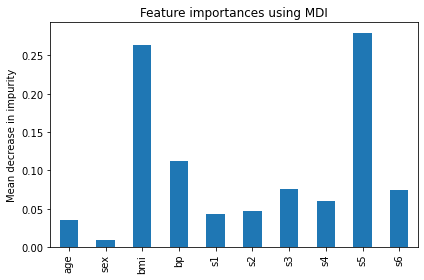

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
importances.plot.bar(ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Extra-Trees

* 랜덤포레스트와 비슷한 ensemble 기법
* 부트스트랩 표본을 사용하지 않고 모든 데이터로 학습
  * 파라미터 설정을 통해 부트스트랩을 수행할 수도 있다
* 각 노드에서 분할을 할때 최적의 분할을 하지 않는다. 랜덤하게 분할을 한다
* 랜덤포레스트에비해 리소스를 작게 사용한다

참고 : [https://towardsdatascience.com/what-when-how-extratrees-classifier-c939f905851c]

## ExtraTrees classifier

#### Hyper-parameter

* n_estimators : int
  * ```default = 100```
  * The number of trees in the forest

* criterion : {'gini', 'log_loss', 'entropy'}
  * ```default = 'gini'```
  * The function to measure the quality of a split

* max_depth: int
  * ```default = None```
  * The maximum depth of the tree
  * If none the tree will expended until the leaves are pure

* min_samples_split : int
  * ```default = 2```
  * The minimum number of samples required to split an internal node

* min_samples_leaf : int or float
  * ```default=1```
  * The minimum number of samples required to be at a leaf node. 
  * min_samples_leaf가 min_samples_split보다 우선된다

* max_features : {“sqrt”, “log2”, None}, int or float
  * ```default = ”sqrt”```
  * The number of features to consider when looking for the best split:

* oob_scores : bool
  * ```default = 'False'```


* 랜덤포레스트와 거의 동일

In [54]:
cancer = load_breast_cancer()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size = 0.2,
                                                    random_state = 2023)                                                   

#### cv-score

In [61]:
model = ExtraTreesClassifier(random_state = 2023)
cv_res = cross_validate(model, 
                        X_train, y_train,
                        cv = ms.KFold(shuffle = True, random_state = 2023))
pd.DataFrame(cv_res).mean()

fit_time      0.131817
score_time    0.011488
test_score    0.958242
dtype: float64

#### parameter tuning

In [62]:
model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2023,
 'verbose': 0,
 'warm_start': False}

In [63]:
from sklearn.model_selection import GridSearchCV
import multiprocessing
import sklearn.model_selection as ms
import time

model = ExtraTreesClassifier(random_state = 2023)

param_dict = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [2,3,4,5],
              'max_features' : ['sqrt', 'log2'],
              'n_estimators' : [100, 200, 300]}

gs = GridSearchCV(model, param_grid = param_dict,
                  cv = ms.StratifiedKFold(shuffle = True, random_state = 2023),
                  n_jobs = multiprocessing.cpu_count())

start = time.time()
gs.fit(X_train, y_train)
end = time.time()

print(f'최적 파라미터 : {gs.best_estimator_}')
print(f'최종 점수 : {gs.score(X_test, y_test)}')
print(f'소요 시간 : {end - start}')

res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score', 'param_criterion',
     'param_max_features', 'param_max_depth', 'param_n_estimators']].head(5)

최적 파라미터 : ExtraTreesClassifier(max_depth=5, max_features='log2', random_state=2023)
최종 점수 : 0.9649122807017544
소요 시간 : 70.23326826095581


,rank_test_score,mean_test_score,param_criterion,param_max_features,param_max_depth,param_n_estimators
23,1,0.958242,gini,log2,5,300
45,1,0.958242,entropy,log2,5,100
21,1,0.958242,gini,log2,5,100
47,1,0.958242,entropy,log2,5,300
18,5,0.956044,gini,sqrt,5,100


In [64]:
from sklearn.model_selection import RandomizedSearchCV
import multiprocessing
import sklearn.model_selection as ms
import time

model = ExtraTreesClassifier(random_state = 2023)

param_dict = {'criterion' : ['gini', 'entropy'],
              'max_depth' : range(1, 11),
              'max_features' : ['sqrt', 'log2'],
              'n_estimators' : range(100, 600, 100)}

rs = RandomizedSearchCV(model, 
                        param_distributions = param_dict,
                        n_iter = 100,
                        cv = ms.StratifiedKFold(shuffle = True, random_state = 2023),
                        n_jobs = -1)

start = time.time()
rs.fit(X_train, y_train)
end = time.time()

print(f'최적 파라미터 : {rs.best_estimator_}')
print(f'최종 점수 : {rs.score(X_test, y_test)}')
print(f'소요 시간 : {end - start}')

res = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score', 'param_criterion',
     'param_max_features', 'param_max_depth', 'param_n_estimators']].head(5)

최적 파라미터 : ExtraTreesClassifier(max_depth=10, max_features='log2', random_state=2023)
최종 점수 : 0.9736842105263158
소요 시간 : 180.20432567596436


,rank_test_score,mean_test_score,param_criterion,param_max_features,param_max_depth,param_n_estimators
60,1,0.973626,gini,log2,10,100
86,2,0.971429,entropy,sqrt,9,500
19,2,0.971429,gini,log2,10,300
88,2,0.971429,gini,log2,10,400
32,2,0.971429,entropy,sqrt,9,200


## ExtraTrees Regressor

### Hyper-parameter

* criterion : {“squared_error”, “absolute_error”, “friedman_mse”, “poisson”}
  * default=”squared_error”

* 나머지는 classifier과 동일

In [34]:
diabetes = load_diabetes()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,
                                                    test_size = 0.2,
                                                    random_state = 2023)

### cv-score

In [19]:
model = ExtraTreesRegressor(random_state = 2023)
cv_res = cross_validate(model, 
                        X_train, y_train,
                        cv = ms.KFold(shuffle = True, random_state = 2023))
pd.DataFrame(cv_res).mean()

fit_time      0.158327
score_time    0.008910
test_score    0.385207
dtype: float64

### parameter tuning

In [20]:
model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2023,
 'verbose': 0,
 'warm_start': False}

In [24]:
from sklearn.model_selection import GridSearchCV
import multiprocessing
import sklearn.model_selection as ms
import time

model = ExtraTreesRegressor(random_state = 2023)

param_dict = {'max_depth' : range(1, 11),
              'max_features' : ['sqrt', 'log2'],
              'n_estimators' : range(100, 600, 100)}

gs = GridSearchCV(model, param_grid = param_dict,
                  cv = ms.KFold(shuffle = True, random_state = 2023),
                  n_jobs = multiprocessing.cpu_count(),
                  verbose = 1)

start = time.time()
gs.fit(X_train, y_train)
end = time.time()

print(f'최적 파라미터 : {gs.best_estimator_}')
print(f'최종 점수 : {gs.score(X_test, y_test)}')
print(f'소요 시간 : {end - start}')

res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score',
     'param_max_features', 'param_max_depth', 'param_n_estimators']].head(5)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
최적 파라미터 : ExtraTreesRegressor(max_depth=9, max_features='sqrt', n_estimators=400,
                    random_state=2023)
최종 점수 : 0.466249215232994
소요 시간 : 158.42355704307556


,rank_test_score,mean_test_score,param_max_features,param_max_depth,param_n_estimators
83,1,0.402767,sqrt,9,400
88,1,0.402767,log2,9,400
89,3,0.402328,log2,9,500
84,3,0.402328,sqrt,9,500
82,5,0.401122,sqrt,9,300


In [42]:
from sklearn.model_selection import RandomizedSearchCV
import multiprocessing
import sklearn.model_selection as ms
import time

model = ExtraTreesRegressor(random_state = 2023)

param_dict = {'max_depth' : range(1, 11),
              'max_features' : ['sqrt', 'log2'],
              'n_estimators' : range(100, 600, 100)}              

rs = RandomizedSearchCV(model, 
                        param_distributions = param_dict,
                        n_iter = 100,
                        cv = ms.KFold(shuffle = True, random_state = 2023),
                        return_train_score = True,
                        n_jobs = multiprocessing.cpu_count(),
                        verbose = 1)

start = time.time()
rs.fit(X_train, y_train)
end = time.time()

print(f'최적 파라미터 : {rs.best_estimator_}')
print(f'최종 점수 : {rs.score(X_test, y_test)}')
print(f'소요 시간 : {end - start}')

res = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_train_score', 'mean_test_score',
     'param_max_features', 'param_max_depth', 'param_n_estimators']].head(5)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
최적 파라미터 : ExtraTreesRegressor(max_depth=9, max_features='sqrt', n_estimators=400,
                    random_state=2023)
최종 점수 : 0.466249215232994
소요 시간 : 160.82832837104797


,rank_test_score,mean_train_score,mean_test_score,param_max_features,param_max_depth,param_n_estimators
83,1,0.863108,0.402767,sqrt,9,400
88,1,0.863108,0.402767,log2,9,400
89,3,0.864711,0.402328,log2,9,500
84,3,0.864711,0.402328,sqrt,9,500
82,5,0.864446,0.401122,sqrt,9,300


## Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화